In [33]:
import pandas as pd
import requests
import numpy as np
from pandas_datareader import data


In [34]:
df = data.DataReader('META', 
                       start='2017-1-1', 
                       end='2021-12-31', 
                       data_source='yahoo')

df.rename(columns={'Date' : 'date', 'Adj Close': 'price_t' }, inplace=True)

df['return'] = (df['price_t']/df['price_t'].shift(1)) - 1


In [35]:
df.head()

,High,Low,Open,Close,Volume,price_t,return
Date,,,,,,,
2017-01-03,117.839996,115.510002,116.029999,116.860001,20663900,116.860001,NaN
2017-01-04,119.660004,117.290001,117.550003,118.690002,19630900,118.690002,0.015660
2017-01-05,120.949997,118.320000,118.860001,120.669998,19492200,120.669998,0.016682
2017-01-06,123.879997,120.029999,120.980003,123.410004,28545300,123.410004,0.022707
2017-01-09,125.430000,123.040001,123.550003,124.900002,22880400,124.900002,0.012074


### The average 'Excepted return' 

The eaisest way to calculate the 'expected return' on a stock is to compute its historic average return.

E[r]= (r1+r2+r3+....+rn)*1/n

In [36]:
expected_return_fb = df['return'].mean()

In [37]:
expected_return_fb*100

0.10611088580198154

In [38]:
len(df['return'].dropna())

1258

In [39]:
df['expected_return']=expected_return_fb
df.head()

,High,Low,Open,Close,Volume,price_t,return,expected_return
Date,,,,,,,,
2017-01-03,117.839996,115.510002,116.029999,116.860001,20663900,116.860001,NaN,0.001061
2017-01-04,119.660004,117.290001,117.550003,118.690002,19630900,118.690002,0.015660,0.001061
2017-01-05,120.949997,118.320000,118.860001,120.669998,19492200,120.669998,0.016682,0.001061
2017-01-06,123.879997,120.029999,120.980003,123.410004,28545300,123.410004,0.022707,0.001061
2017-01-09,125.430000,123.040001,123.550003,124.900002,22880400,124.900002,0.012074,0.001061


<AxesSubplot:xlabel='Date'>

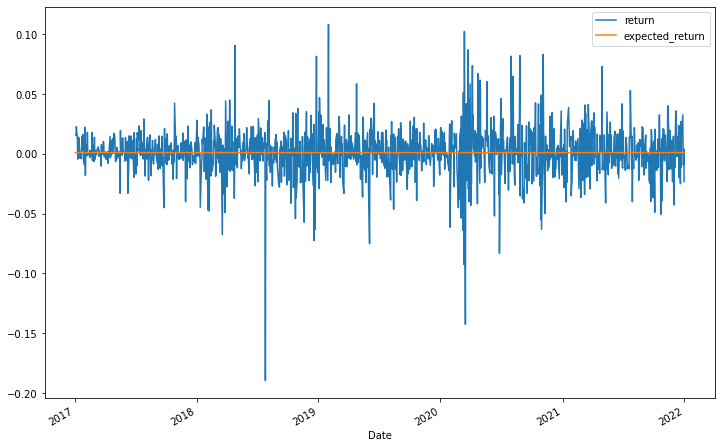

In [40]:
df[['return','expected_return']].plot(figsize=(12,8))

### Annulising Expected Returns

- The Crude method
    - E[r] = 0.13% * 250 = 32.5%
    
- The Sophisticated method:
  - E[r] = (1+0.13%)^250-1=38.37%
  
### An alternative approach is to use 'moving average' expected returns

the biggest limitation of the mean based Expected return is the fact that it relies solely on historic data / information.

We could overcome this by estimating 'State Contigent' expected returns or by using assert pricing models.

In [41]:
df['expected_return_moving_avg_30d']=df['return'].rolling(30).mean()
df.head(31)

,High,Low,Open,Close,Volume,price_t,return,expected_return,expected_return_moving_avg_30d
Date,,,,,,,,,
2017-01-03,117.839996,115.510002,116.029999,116.860001,20663900,116.860001,NaN,0.001061,NaN
2017-01-04,119.660004,117.290001,117.550003,118.690002,19630900,118.690002,0.015660,0.001061,NaN
2017-01-05,120.949997,118.320000,118.860001,120.669998,19492200,120.669998,0.016682,0.001061,NaN
2017-01-06,123.879997,120.029999,120.980003,123.410004,28545300,123.410004,0.022707,0.001061,NaN
2017-01-09,125.430000,123.040001,123.550003,124.900002,22880400,124.900002,0.012074,0.001061,NaN
2017-01-10,125.500000,124.279999,124.820000,124.349998,17324600,124.349998,-0.004404,0.001061,NaN
2017-01-11,126.120003,124.059998,124.349998,126.089996,18356500,126.089996,0.013993,0.001061,NaN
2017-01-12,126.730003,124.800003,125.610001,126.620003,18653900,126.620003,0.004203,0.001061,NaN
2017-01-13,129.270004,127.370003,127.489998,128.339996,24884300,128.339996,0.013584,0.001061,NaN


<AxesSubplot:xlabel='Date'>

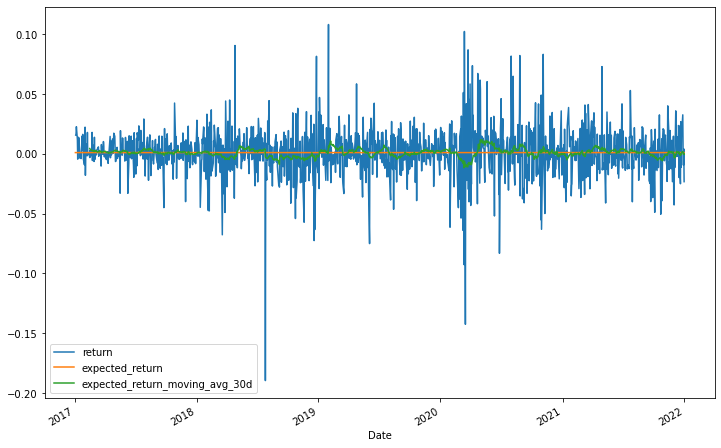

In [42]:
df[['return','expected_return','expected_return_moving_avg_30d']].plot(figsize=(12,8))

In [43]:
df['expected_return_moving_avg_7d']=df['return'].rolling(7).mean()
df.head(31)

,High,Low,Open,Close,Volume,price_t,return,expected_return,expected_return_moving_avg_30d,expected_return_moving_avg_7d
Date,,,,,,,,,,
2017-01-03,117.839996,115.510002,116.029999,116.860001,20663900,116.860001,NaN,0.001061,NaN,NaN
2017-01-04,119.660004,117.290001,117.550003,118.690002,19630900,118.690002,0.015660,0.001061,NaN,NaN
2017-01-05,120.949997,118.320000,118.860001,120.669998,19492200,120.669998,0.016682,0.001061,NaN,NaN
2017-01-06,123.879997,120.029999,120.980003,123.410004,28545300,123.410004,0.022707,0.001061,NaN,NaN
2017-01-09,125.430000,123.040001,123.550003,124.900002,22880400,124.900002,0.012074,0.001061,NaN,NaN
2017-01-10,125.500000,124.279999,124.820000,124.349998,17324600,124.349998,-0.004404,0.001061,NaN,NaN
2017-01-11,126.120003,124.059998,124.349998,126.089996,18356500,126.089996,0.013993,0.001061,NaN,NaN
2017-01-12,126.730003,124.800003,125.610001,126.620003,18653900,126.620003,0.004203,0.001061,NaN,0.011559
2017-01-13,129.270004,127.370003,127.489998,128.339996,24884300,128.339996,0.013584,0.001061,NaN,0.011263


<AxesSubplot:xlabel='Date'>

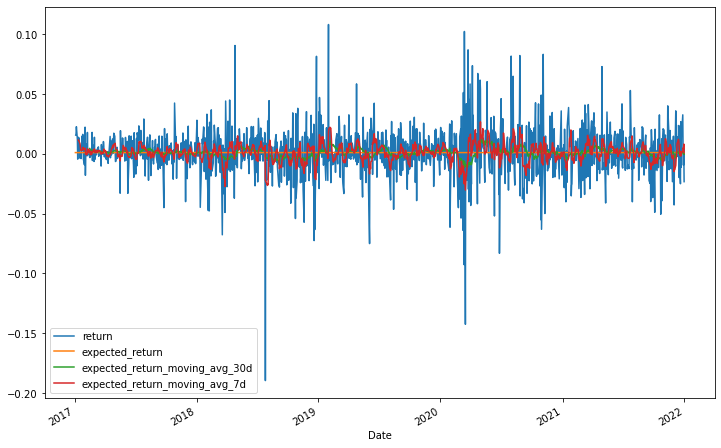

In [44]:
df[['return','expected_return','expected_return_moving_avg_30d','expected_return_moving_avg_7d']].plot(figsize=(12,8))